In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df_vehicle_price = pd.read_csv('../data/processed/vehicle_price.csv')
df_vehicle_price.head()

,Unnamed: 0,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,...,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
0,0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,...,Brown,5,No Accident,Dealer,Excellent,EX,9,20433.666667,0.040054,7208.52
1,1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,...,Beige,5,Minor,Dealer,Good,LX,15,15776.200000,0.039921,6911.81
2,2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,...,Beige,5,No Accident,Dealer,Excellent,Touring,9,11466.555556,0.040230,11915.63
3,3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,...,Gray,3,No Accident,Private,Good,Base,9,13209.888889,0.039847,25984.79
4,4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,...,Brown,5,Minor,Dealer,Excellent,Sport,7,29167.142857,0.039627,8151.30


In [5]:
# Selección de variables usando price como variable objetivo 
features = ['year', 'mileage', 'engine_hp', 'fuel_type', 'transmission',
            'drivetrain', 'body_type', 'owner_count', 'condition', 'vehicle_age']
target = 'price'

In [6]:
# Dividir los datos 
X = df_vehicle_price[features]
y = df_vehicle_price[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Procesamiento manejar datos categóricos y númericos
numeric_features = ['year', 'mileage', 'engine_hp', 'owner_count', 'vehicle_age']
categorical_features = ['fuel_type', 'transmission', 'drivetrain', 'body_type', 'condition']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [8]:
# Creación de modelo de regresión 
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [9]:
# Entrenar el modelo
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [10]:
# Evaluación del modelo
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.3f}")

MAE: 3174.71
MSE: 18911377.31
R²: 0.899


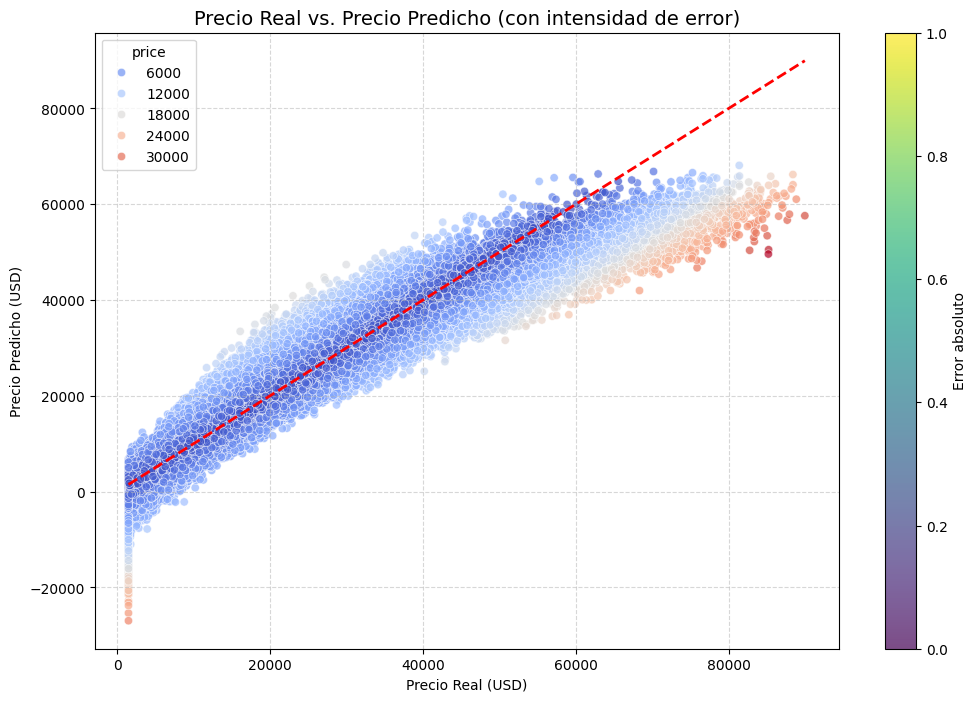

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las predicciones
# y_pred = model.predict(X_test)

error = abs(y_test - y_pred)

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=y_test, y=y_pred, hue=error, palette='coolwarm', alpha=0.7)
mappable = ax.collections[0]
cbar = plt.colorbar(mappable, label='Error absoluto')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Precio Real vs. Precio Predicho (con intensidad de error)', fontsize=14)
plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

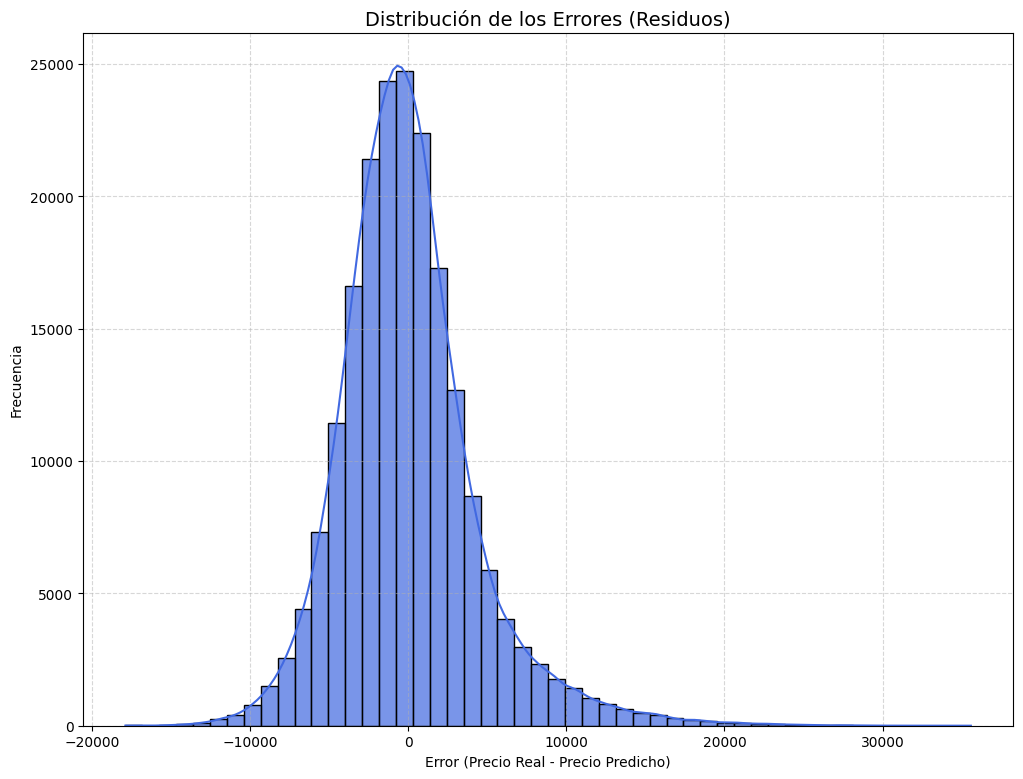

In [14]:
# Calcular los residuos
residuos = y_test - y_pred

plt.figure(figsize=(12,9))
sns.histplot(residuos, bins=50, kde=True, color='royalblue', alpha=0.7)
plt.title('Distribución de los Errores (Residuos)', fontsize=14)
plt.xlabel('Error (Precio Real - Precio Predicho)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()